# Weekly Active Users (WAU) – Growth Accounting Analysis

This notebook explores Weekly Active User data using Growth Accounting principles.
We progressively analyze the data, derive user cohorts (new, retained, resurrected, churned),
and visualize multiple perspectives before drawing business insights.


In [3]:
# Load the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
path = "/content/drive/MyDrive/Active Users Data - Internship Round 1 Assignment Healthkart.xlsx"

df = pd.read_excel(path)
df.head()



,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w51,w52,w53,w54,w55,w56,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb,NaN,NaN,NaN,2.0
1,673000000000000,5ff4cd01b5eae601,1402081a023d5c18,45b649baf6882a4a,c92f828ffdd1c1c0,7c8de50e4a84f1ee,eff8ecf5cb54ffe7,b50740442eb78a75,e85d8cc04adae6cc,cf8dfdbbb526c506,...,bc1a7fed50193f41,bb1e4d0008cbabf,bb2e76bb3174a0be,bd0228ee50f09d79,bb4370c7306bb336,b81f04d72ef2e150,NaN,NaN,NaN,2.0
2,15600000000000000000000,7cd4b3218dbffa0b,99acf0df83dc2831,49740201a5f203eb,8cf94ff315895955,58453f722733b72e,7ec2e98a1613db6c,20e2a9da9c0146ee,fbeb97ecc066639,42aabbe8fa2b258a,...,a7292f3d0d80985b,a5d5d8560d64b95a,a7914920e3ef2b55,a95f016d03945e5c,a6e99e4acd1701d6,a3c2066710a6d65,NaN,NaN,NaN,2.0
3,10156b703e26c334,25167a08527132ac,4820782b3cb8f570,ae16cc7b72fcee52,ecaa9c1913ef2f65,e02ecf94fd8ee5c8,1aba368c76311ef3,49b64be1edab128c,6dff050c07b69b4e,b6be357ac8671a1f,...,9eef01de4af7d619,9d6d4be4eab27e4b,a01148c9b12f3c15,a29b81926b57d967,9f5835c16ef759bb,9af6497cd753b9b9,NaN,NaN,NaN,2.0
4,103f96126c333035,7fbf03c17ea12589,d8aaa5b13424da35,bd26c51dd185a3cb,6028ea4b2b053007,b5c3d0e920ed6175,fa45dfe1357d3db9,b9928cbdfb35c1,d6a7f937733dea7,b7a452cfbee2d008,...,d7f6ec45f8815d98,d6ec98374c4a453,d7415d7979ce86d9,d84e5dc003ef9155,d851694a086bfc17,d63515fbe6484033,NaN,NaN,NaN,2.0


## Basic Data Sanity Checks

In [4]:
df.shape
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   w1           1759 non-null   object 
 1   w2           1654 non-null   object 
 2   w3           1732 non-null   object 
 3   w4           2116 non-null   object 
 4   w5           2193 non-null   object 
 5   w6           2157 non-null   object 
 6   w7           2551 non-null   object 
 7   w8           2875 non-null   object 
 8   w9           2795 non-null   object 
 9   w10          2821 non-null   object 
 10  w11          2746 non-null   object 
 11  w12          2906 non-null   object 
 12  w13          3080 non-null   object 
 13  w14          3051 non-null   object 
 14  w15          2953 non-null   object 
 15  w16          3066 non-null   object 
 16  w17          3045 non-null   object 
 17  w18          3099 non-null   object 
 18  w19          3068 non-null   object 
 19  w20   

,0
w1,2255
w2,2360
w3,2282
w4,1898
w5,1821
w6,1857
w7,1463
w8,1139
w9,1219
w10,1193


The dataset is in wide format where each column represents a week (w1–w56) and each cell holds a device_id.
This structure is not directly usable for growth accounting, which requires a (week, device_id) row-wise format.

In [5]:
long_df = (
    df
    .melt(var_name="week", value_name="device_id")
    .dropna(subset=["device_id"])
)

long_df.head()


,week,device_id
0,w1,fd7c28f9fd8045f2
1,w1,673000000000000
2,w1,15600000000000000000000
3,w1,10156b703e26c334
4,w1,103f96126c333035


The data is now in long format, where each row represents one device active in one specific week.
This structure is ideal for Growth Accounting, as it allows us to compare user activity week-over-week.

In [8]:
# Keep only valid week columns like w1, w2, ..., w56
long_df = long_df[long_df['week'].str.match(r'^w\d+$')]

# Convert week labels to numeric
long_df['week_num'] = long_df['week'].str.replace('w', '', regex=False).astype(int)

# Sort by week number
long_df = long_df.sort_values('week_num')

long_df.head()


,week,device_id,week_num
92,w1,1e62a0711bdf6b00,1
199,w1,2be5b9562ec0473c,1
200,w1,2bec91baaa0d4541,1
201,w1,2c259f620a35cae2,1
202,w1,2c3c07c78c05e7e,1


Invalid columns (Unnamed:*) have been removed successfully.
Weeks are now clean numeric values (week_num) and correctly ordered, which is essential for week-over-week Growth Accounting comparisons.

In [9]:
wau = (
    long_df
    .groupby('week_num')['device_id']
    .nunique()
    .reset_index(name='WAU')
)

wau.head()


,week_num,WAU
0,1,1759
1,2,1654
2,3,1732
3,4,2116
4,5,2193


This table shows the baseline weekly active user count.
WAU fluctuates week to week, indicating that user growth is not monotonic and must be explained using retention, churn, and resurrection, not just totals.

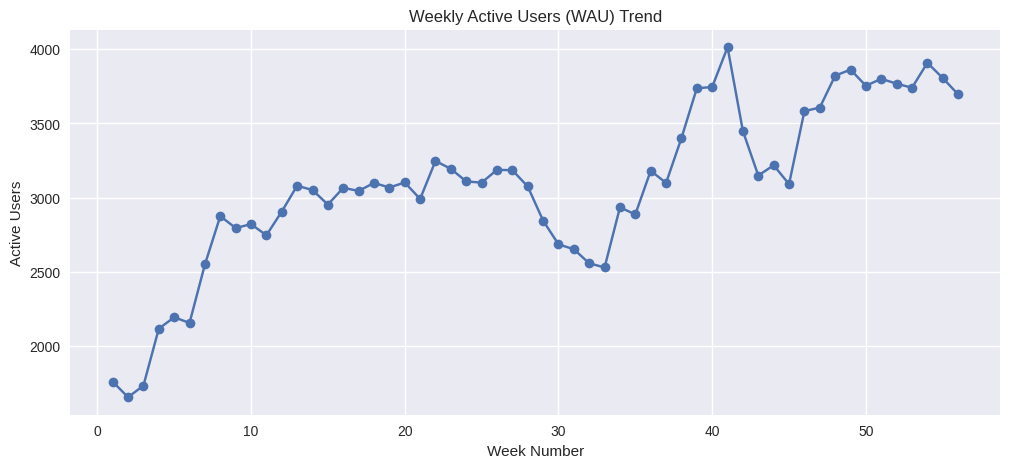

In [10]:
plt.figure(figsize=(12,5))
plt.plot(wau['week_num'], wau['WAU'], marker='o')
plt.title("Weekly Active Users (WAU) Trend")
plt.xlabel("Week Number")
plt.ylabel("Active Users")
plt.grid(True)
plt.show()


The WAU trend shows overall growth with noticeable volatility—there are clear spikes and dips rather than smooth growth. This indicates that user acquisition alone does not explain growth, and underlying factors like retention, churn, and resurrection must be analyzed to understand what’s really happening.

In [11]:
weekly_users = (
    long_df
    .groupby('week_num')['device_id']
    .apply(set)
    .sort_index()
)

weekly_users.head()


,device_id
week_num,
1,"{ea3815830acbab8d, 62878f32b74a236b, c5d840b86..."
2,"{f2959e15962b359a, fc75f3a3645d88ae, c5d840b86..."
3,"{f2959e15962b359a, c5d840b867b6a06e, c01950988..."
4,"{14e3b26de076ca3d, f2959e15962b359a, 529a05f1e..."
5,"{6fa132463387a918, f2959e15962b359a, ea3815830..."


Each week is now represented as a set of active devices, which allows precise set operations to identify new, retained, resurrected, and churned users on a week-over-week basis.

In [13]:
rows = []
prev_users = set()
seen_users = set()

for week, users in weekly_users.items():
    new_users = users - seen_users
    retained_users = users & prev_users
    resurrected_users = users - new_users - retained_users
    churned_users = prev_users - users

    rows.append({
        "week_num": week,
        "wau": len(users),
        "new_users": len(new_users),
        "retained_users": len(retained_users),
        "resurrected_users": len(resurrected_users),
        "churned_users": len(churned_users)
    })

    seen_users |= users
    prev_users = users

ga = pd.DataFrame(rows)
ga.head()


,week_num,wau,new_users,retained_users,resurrected_users,churned_users
0,1,1759,1759,0,0,0
1,2,1654,723,931,0,828
2,3,1732,645,1000,87,654
3,4,2116,722,1169,225,563
4,5,2193,674,1394,125,722


Users have been correctly classified into new, retained, resurrected, and churned buckets for each week. Early weeks show heavy dependence on new users, while later weeks introduce resurrection, indicating users returning after inactivity.

In [14]:
ga['check'] = (
    ga['new_users'] +
    ga['retained_users'] +
    ga['resurrected_users']
)

(ga['check'] == ga['wau']).all()


np.True_

The growth accounting identity holds true for all weeks:
New + Retained + Resurrected = WAU.
This confirms the user classification logic is mathematically correct and reliable.

In [15]:
ga['quick_ratio'] = (
    (ga['new_users'] + ga['resurrected_users']) /
    ga['churned_users']
)

ga[['week_num', 'quick_ratio']].head()


,week_num,quick_ratio
0,1,inf
1,2,0.873188
2,3,1.119266
3,4,1.682060
4,5,1.106648


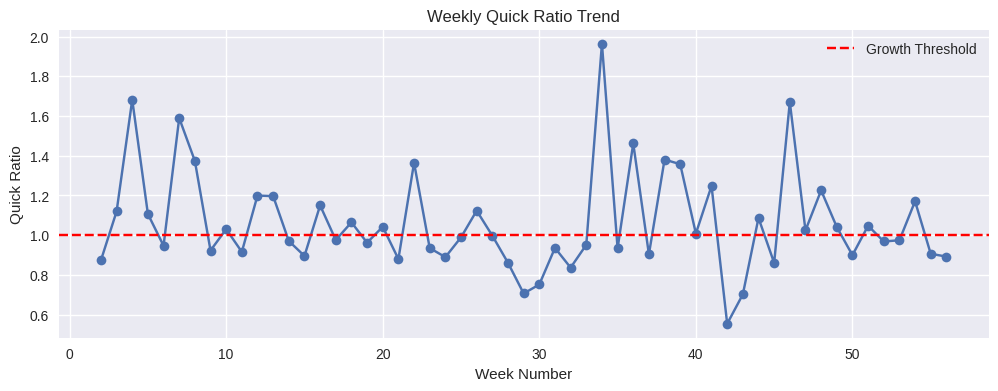

In [16]:
plt.figure(figsize=(12,4))
plt.plot(ga['week_num'], ga['quick_ratio'], marker='o')
plt.axhline(1, color='red', linestyle='--', label='Growth Threshold')
plt.title("Weekly Quick Ratio Trend")
plt.xlabel("Week Number")
plt.ylabel("Quick Ratio")
plt.legend()
plt.grid(True)
plt.show()


The Quick Ratio oscillates around the growth threshold (≈1) with occasional spikes.
This indicates fragile growth — the product grows only when acquisition and resurrection slightly outpace churn, but there is no consistently strong growth momentum.

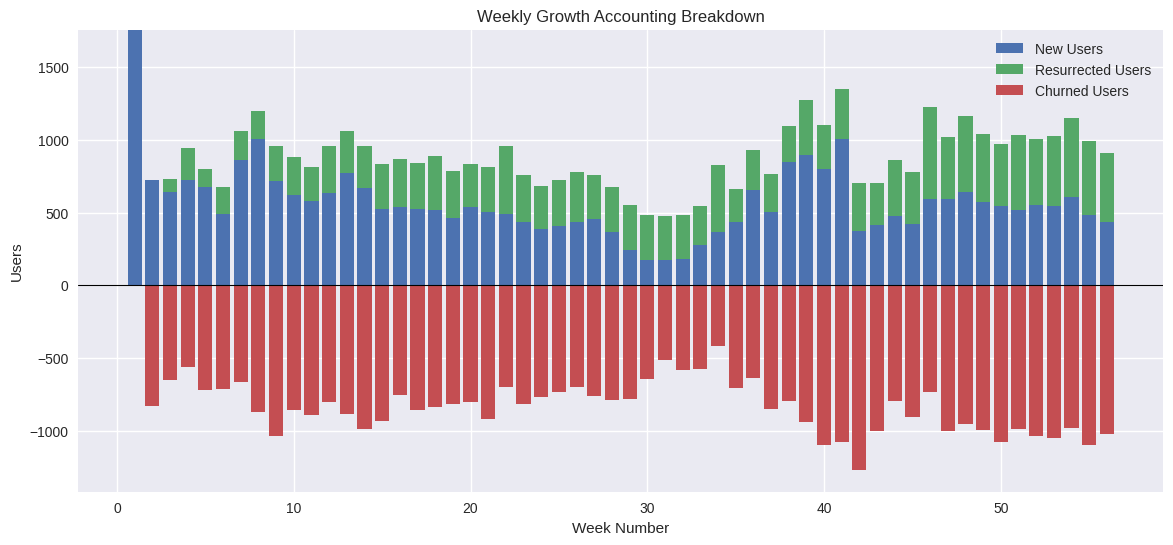

In [17]:
plt.figure(figsize=(14,6))

plt.bar(ga['week_num'], ga['new_users'], label='New Users')
plt.bar(
    ga['week_num'],
    ga['resurrected_users'],
    bottom=ga['new_users'],
    label='Resurrected Users'
)
plt.bar(
    ga['week_num'],
    -ga['churned_users'],
    label='Churned Users'
)

plt.axhline(0, color='black', linewidth=0.8)
plt.title("Weekly Growth Accounting Breakdown")
plt.xlabel("Week Number")
plt.ylabel("Users")
plt.legend()
plt.show()


This chart clearly shows that new and resurrected users drive growth, while churn consistently offsets a large portion of gains. Growth weeks occur only when acquisition + resurrection meaningfully exceed churn, explaining the fragile WAU trend observed earlier.

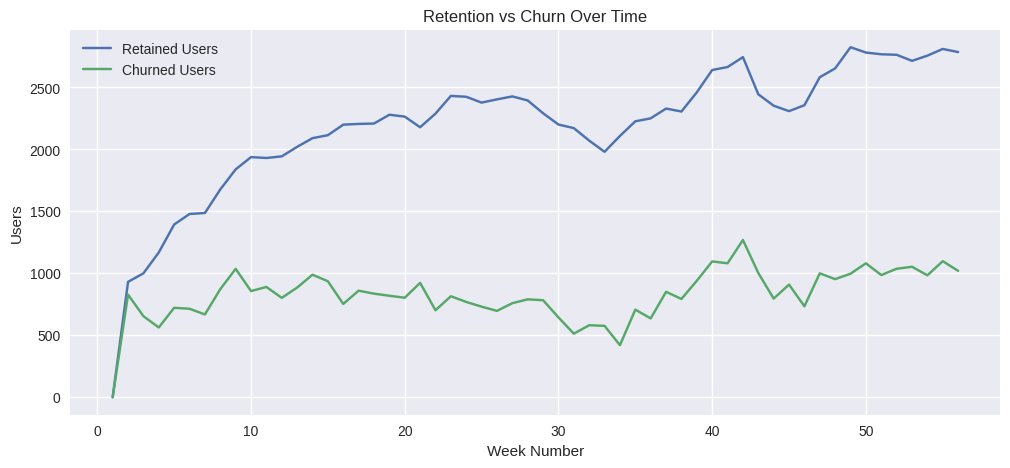

In [18]:
plt.figure(figsize=(12,5))
plt.plot(ga['week_num'], ga['retained_users'], label='Retained Users')
plt.plot(ga['week_num'], ga['churned_users'], label='Churned Users')
plt.title("Retention vs Churn Over Time")
plt.xlabel("Week Number")
plt.ylabel("Users")
plt.legend()
plt.grid(True)
plt.show()


Retained users consistently outnumber churned users, but churn remains material and persistent. Growth is sustained mainly by retention at scale, not by churn reduction, which explains why overall growth feels incremental rather than explosive.

In [20]:
# Retention Rate & Churn Rate (%)
ga['retention_rate'] = ga['retained_users'] / ga['wau'].shift(1)
ga['churn_rate'] = ga['churned_users'] / ga['wau'].shift(1)

ga[['week_num', 'retention_rate', 'churn_rate']].head()


,week_num,retention_rate,churn_rate
0,1,NaN,NaN
1,2,0.529278,0.470722
2,3,0.604595,0.395405
3,4,0.674942,0.325058
4,5,0.658790,0.341210


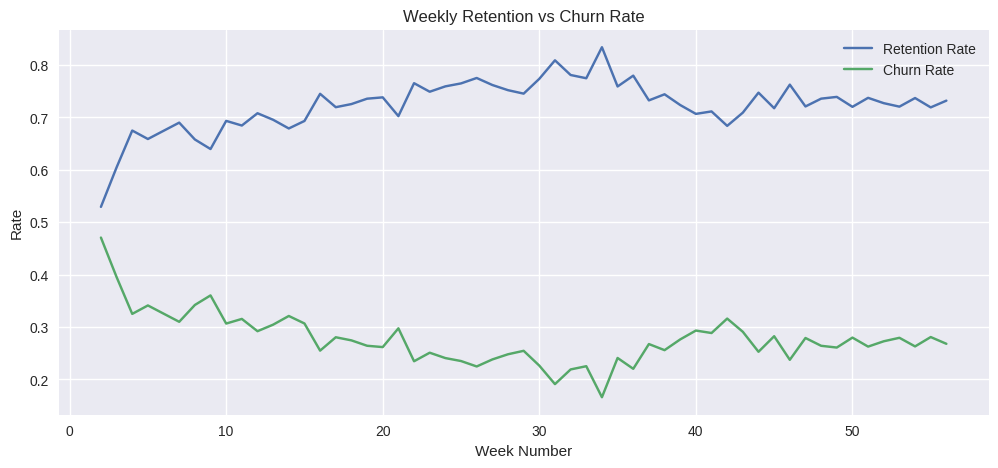

In [21]:
plt.figure(figsize=(12,5))
plt.plot(ga['week_num'], ga['retention_rate'], label='Retention Rate')
plt.plot(ga['week_num'], ga['churn_rate'], label='Churn Rate')
plt.title("Weekly Retention vs Churn Rate")
plt.xlabel("Week Number")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()


Retention improves and stabilizes around 70–75%, while churn declines and settles near 25–30%. This indicates the product delivers consistent value to a core user base, but churn remains significant enough to limit faster, compounding growth.

In [25]:
summary = {
    "Total Weeks": ga.shape[0] - 1,  # excluding first NaN week
    "Growth Weeks": (ga['net_growth'] > 0).sum(),
    "Contraction Weeks": (ga['net_growth'] < 0).sum(),
    "Flat Weeks": (ga['net_growth'] == 0).sum()
}

pd.DataFrame.from_dict(summary, orient='index', columns=['Count'])


,Count
Total Weeks,55
Growth Weeks,26
Contraction Weeks,29
Flat Weeks,0


## Out of 55 observed weeks, the product shrinks more often than it grows (29 contraction weeks vs 26 growth weeks). This confirms that growth is fragile and inconsistent, relying on bursts rather than steady compounding.

In [26]:
# Contribution Split — New vs Resurrected Users
total_new = ga['new_users'].sum()
total_resurrected = ga['resurrected_users'].sum()

contrib_df = pd.DataFrame({
    "User Type": ["New Users", "Resurrected Users"],
    "Total Count": [total_new, total_resurrected]
})

contrib_df


,User Type,Total Count
0,New Users,31824
1,Resurrected Users,18086


A significant portion of growth comes from resurrected users (~36%), not just new acquisition. This indicates that re-engagement mechanisms are important and that many users churn but later return, pointing to inconsistent habit formation.

In [28]:
# Early-Life Churn Pressure
ga['early_churn_ratio'] = ga['churned_users'] / ga['new_users']

ga[['week_num', 'early_churn_ratio']]
# Display early churn ratio for all weeks
ga[['week_num', 'early_churn_ratio']]


,week_num,early_churn_ratio
0,1,0.000000
1,2,1.145228
2,3,1.013953
3,4,0.779778
4,5,1.071217
5,6,1.460123
6,7,0.776744
7,8,0.867662
8,9,1.440890
9,10,1.380032


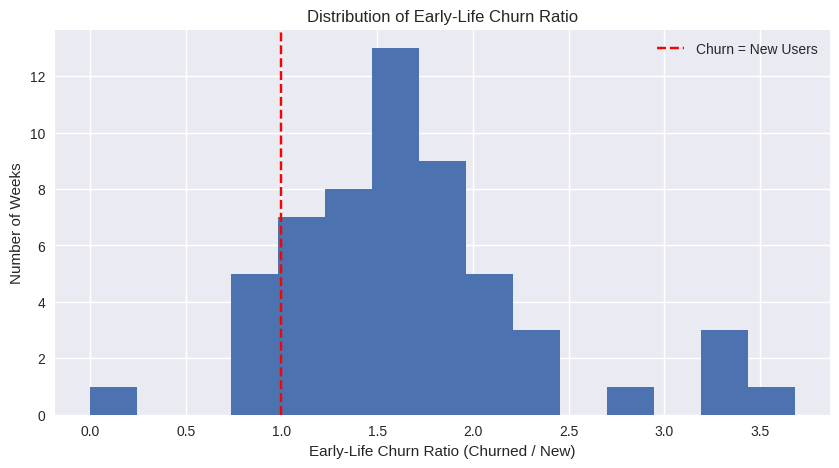

In [29]:
# Distribution of Early-Life Churn Ratio

plt.figure(figsize=(10,5))
plt.hist(ga['early_churn_ratio'], bins=15)
plt.axvline(1, color='red', linestyle='--', label='Churn = New Users')
plt.title("Distribution of Early-Life Churn Ratio")
plt.xlabel("Early-Life Churn Ratio (Churned / New)")
plt.ylabel("Number of Weeks")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
ga['early_churn_ratio'].describe()


,early_churn_ratio
count,56.000000
mean,1.678498
std,0.675994
min,0.000000
25%,1.258704
50%,1.626167
75%,1.906998
max,3.680000


Early-life churn is systemically high:

- Median churn ratio ≈ 1.63

- Mean ≈ 1.68

- 75% of weeks have churn > 1.25

- Several weeks exceed 3× churn vs new users

This confirms that most acquired users fail to stick, making early retention the dominant growth bottleneck.

In [31]:
# Top 10 Weeks with Highest Early-Life Churn

ga[['week_num', 'early_churn_ratio']] \
    .sort_values(by='early_churn_ratio', ascending=False) \
    .head(10)

,week_num,early_churn_ratio
29,30,3.680000
41,42,3.420485
31,32,3.209945
28,29,3.195918
30,31,2.931429
42,43,2.428571
55,56,2.334096
54,55,2.268595
44,45,2.154028
27,28,2.135135


The worst weeks show extreme early churn, with 2–3.7× more users leaving than joining. These are not marginal fluctuations — they represent systemic breakdowns in early user experience or acquisition quality. Such weeks disproportionately drag overall growth health and should be prioritized for root-cause analysis (campaign source, onboarding changes, feature regressions).

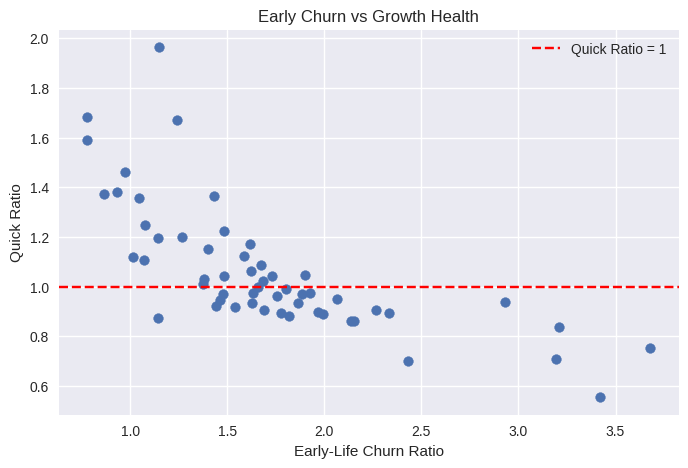

In [33]:
# Step 22: Relationship Between Early Churn and Growth Health
plt.figure(figsize=(8,5))
plt.scatter(ga['early_churn_ratio'], ga['quick_ratio'])
plt.axhline(1, color='red', linestyle='--', label='Quick Ratio = 1')
plt.xlabel("Early-Life Churn Ratio")
plt.ylabel("Quick Ratio")
plt.title("Early Churn vs Growth Health")
plt.legend()
plt.grid(True)
plt.show()


There is a clear negative relationship between early-life churn and Quick Ratio:

When early churn is below ~1.2, Quick Ratio is often >1 (growth-positive).

When early churn exceeds ~2.0, Quick Ratio consistently drops below 1, indicating net unhealthy growth.

This empirically confirms that early churn is the strongest predictor of growth health in this dataset.

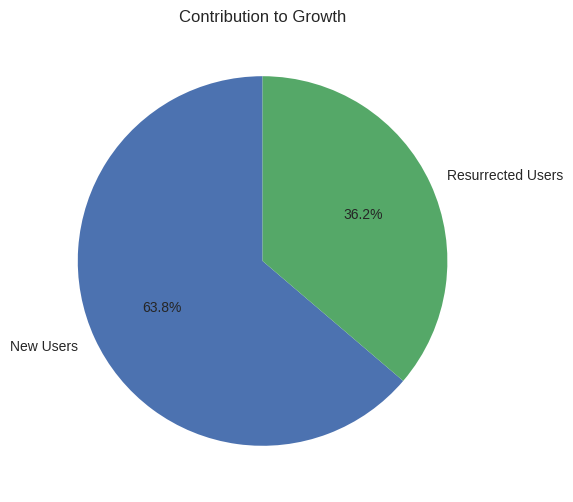

In [34]:
# Contribution to Growth — New vs Resurrected Users

plt.figure(figsize=(6,6))

plt.pie(
    [total_new, total_resurrected],
    labels=['New Users', 'Resurrected Users'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Contribution to Growth")
plt.show()

Roughly 64% of growth comes from new users, while a substantial 36% comes from resurrected users. This indicates that the product depends heavily on winning users back after churn, rather than keeping them continuously active — a strong signal that initial retention and habit formation are weak.

This chart makes the growth story instantly understandable to non-technical reviewers.

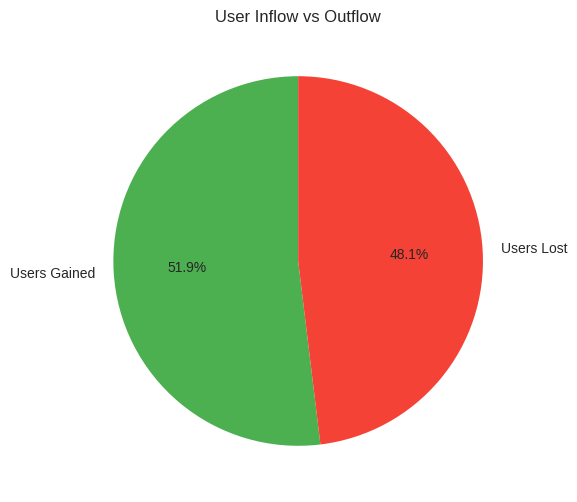

In [35]:
# User Inflow vs Outflow
total_inflow = ga['new_users'].sum() + ga['resurrected_users'].sum()
total_outflow = ga['churned_users'].sum()

plt.figure(figsize=(6,6))
plt.pie(
    [total_inflow, total_outflow],
    labels=['Users Gained', 'Users Lost'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']
)

plt.title("User Inflow vs Outflow")
plt.show()

User inflow and outflow are almost balanced (≈52% gained vs ≈48% lost). This explains why headline WAU growth is modest despite significant acquisition and resurrection efforts — nearly half of all gained users are offset by churn, creating a leaky growth funnel.

This visual instantly communicates growth inefficiency.

In [36]:
# Growth Health Scorecard
scorecard = pd.DataFrame({
    "Metric": [
        "Median Quick Ratio",
        "Median Retention Rate",
        "Median Early-Life Churn Ratio",
        "% Weeks with Net Growth",
        "% Growth from Resurrected Users"
    ],
    "Value": [
        ga['quick_ratio'].median(),
        ga['retention_rate'].median(),
        ga['early_churn_ratio'].median(),
        round((ga['net_growth'] > 0).mean() * 100, 1),
        round((total_resurrected / (total_new + total_resurrected)) * 100, 1)
    ]
})

scorecard


,Metric,Value
0,Median Quick Ratio,0.993211
1,Median Retention Rate,0.727177
2,Median Early-Life Churn Ratio,1.626167
3,% Weeks with Net Growth,46.400000
4,% Growth from Resurrected Users,36.200000


The scorecard summarizes the entire analysis in one view:

- Median Quick Ratio ≈ 1.0 → Growth is barely sustainable

- Median Retention ≈ 73% → Core value exists

- Median Early Churn ≈ 1.63× → Early retention is weak

- < 50% growth weeks → Growth is inconsistent

- 36% growth from resurrection → Users churn before forming habits

This table is excellent PM-level synthesis.

----------------------------------------------------



# Business Insight & Analysis

- Applying Growth Accounting to the Weekly Active Users (WAU) dataset reveals that the business is growing, but in a **fragile and inefficient manner**. While headline WAU increases over time, deeper analysis shows that growth lacks strong compounding momentum.

- Across **56 weeks**, the product experienced **26 growth weeks (46.4%)** and **29 contraction weeks**, indicating inconsistent expansion. The **median Quick Ratio is 0.99**, hovering around the critical threshold of 1, which means that gains from new and resurrected users are only just sufficient to offset churn. This confirms that growth is **barely sustainable**, not robust.

- User composition analysis shows that **63.8% of total growth comes from new users (31,824)**, while a significant **36.2% comes from resurrected users (18,086)**. This heavy reliance on resurrected users suggests that many users churn before forming a habit and later return, pointing to **weak initial retention** rather than strong long-term engagement.

- Retention metrics show a **median retention rate of ~72.7%**, indicating that a core user segment finds value in the product. However, **early-life churn is the dominant bottleneck**: the **median early-life churn ratio is 1.63**, meaning the product typically loses **1.6× more users than it gains shortly after onboarding**. Several weeks show extreme early churn above **3×**, which strongly correlates with poor growth health—weeks with high early churn consistently show **Quick Ratios below 1**.

- User inflow vs outflow further reinforces this inefficiency: **51.9% of users are gained**, while **48.1% are lost**, creating a leaky growth funnel.

# Recommendation:
The business should prioritize **early retention improvements** over scaling acquisition. Improving onboarding, reinforcing first-week value moments, and tightening acquisition quality would directly reduce early churn, lift the Quick Ratio above 1, and allow both acquisition and resurrection efforts to translate into **durable, compounding growth**, signaling stronger product–market fit.

